# Opis wkładu
Każda z nas samodzielnie napisała rozwiązania do zadań projektu. Następnie wymieniłyśmy się kodami i je sprawdziłyśmy.</br>
Katarzyna zidentyfikowała źródło niezgodności rozwiązań, dopracowała ostateczne opisy i interpretacje wyników.</br>
Anastazja poprawiła błąd na podstawie rozwiązania Katarzyny i dopracowała ostateczny kod z rozwiązaniami zadań projektu.

# Mały projekt 1: wizualizacja poziomu zanieczyszczeń (PM2.5)

Główny Inspektorat Ochrony Środowiska (GIOS) udostępnia dane o jakości powietrza w Polsce na stronie [https://powietrze.gios.gov.pl](https://powietrze.gios.gov.pl), tj. poziom stężenia pyłów PM2.5, PM10, SO2 i innych zanieczyszczeń. Dane te są szczególnie przydatne w analizach środowiskowych i zdrowotnych. W tym zadaniu interesują nas godzinne pomiary stężeń drobnego pyłu **PM2.5** (pyłu o średnicy poniżej 2.5 µm) w latach **2014, 2019 i 2024**. Pyły PM2.5 są one bardzo szkodliwe dla zdrowia, gdyż mogąc przenikać głęboko do układu oddechowego i krwiobiegu. Zadanie polega na przeprowadzeniu analizy danych wraz z opisami czynności oraz wykresami.

## Wymagania ogólne

- Rozwiązanie należy przygotować w formie **Jupyter Notebooka (`.ipynb`)**.  Rozwiązanie proszę przesłać przez Moodle’a.
- Wszystkie operacje czyszczenia i łączenia danych wykonaj **programistycznie**, bez ręcznej edycji plików.
- Do każdego punktu należy obowiązkowo dodać opis z analizą otrzymanych wyników.  
- Zadanie należy wykonać w wylosowanych parach. Obie osoby z pary przesyłają **identyczne pliki** i dodają na początku notebooka opis swojego wkładu.
- Ocena jest wspólna dla pary, a nie indywidualna.

## Dane wejściowe i metadane

- Każdy rok to archiwum ZIP dostępne pod adresem [https://powietrze.gios.gov.pl/pjp/archives/](https://powietrze.gios.gov.pl/pjp/archives/).
- Wewnątrz znajdują się pliki Excel, np. `2024_PM25_1g.xlsx`.
- Poniższa funkcja `download_gios_archive` pozwala odczytać odpowiedni zbior danych; resztę danych pomijamy.
- Użyj pliku metadanych (dostępnego na tej samej stronie), aby zaktualizować **kody stacji** (część stacji mogła w międzyczasie zmienić nazwę). W metadanych znajdziesz odpowiednie kolumny.

## Zadania

### 1. Wczytanie i czyszczenie danych

Wczytaj dane dla lat **2014, 2019 i 2024**, oczyścić je z niepotrzebnych wierszy oraz ujednolić ich format. Zaktualizuj stare kody stacji zgodnie z metadanymi. Pozostaw tylko stacje występujące we wszystkich trzech latach. Informacje o stacjach pomiarowych warto uzupełnić o miejscowości dostępne w metadanych, np. za pomocą MultiIndex: (miejscowość, kod stacji). Pomiary dokonane o północy (00:00:00) powinny być potraktowane jako dotyczące poprzedniego dnia. Połącz dane z trzech lat w jeden `DataFrame` i zapisz do pliku.

### 2. Średnie miesięczne + trend dla miast

Oblicz średnie miesięczne stężenie PM2.5 dla każdej stacji i roku. Dla **Warszawy** i **Katowic**, po uśrednieniu po wszystkich stacjach z tych miast, narysuj wykres liniowy pokazujący trend średnich miesięcznych wartości PM2.5 w 2014 i 2024 roku. Oś X - miesiące (1-12); oś Y - średnia wartość PM2.5; 4 linie trendu. Dołącz opis i interpretację obserwowanych różnic.

### 3. Heatmapa miesięcznych średnich

Dla każdej miejscowości przedstaw heatmapę średnich miesięcznych stężeń PM2.5 w latach lat 2014, 2019 i 2024 (oś X – miesiąc, oś Y – rok). Uśrednij wartości po wszystkich stacjach w danej miejscowości. Każdy panel (facet) ma odpowiadać jednej miejscowości. Dołącz interpretację obserwowanych wyników.

### 4. Dni z przekroczeniem normy (WHO)

Dla każdej stacji i roku policz liczbę dni, w których wystąpiło przekroczenie dobowej normy stężenia PM2.5, czyli 15 µg/m³ (źródło: [https://airscan.org/new-who-air-quality-guidelines-2021/](https://airscan.org/new-who-air-quality-guidelines-2021/)). Znajdź 3 stacje z najmniejszą i 3 stacje z największą liczbą dni z przekroczeniem normy dobowej w 2024 roku. Dla tych 6 stacji narysuj *grouped barplot*, gdzie oś X – stacje, oś Y – liczba dni z przekroczeniem, kolor – rok (2014, 2019, 2024). Dołącz opis i interpretację obserwowanych różnic.

## Dodatkowe wymagania i sugestie

- Notebook powinien zawierać *sanity checks*, np.:
  - liczba stacji w każdym pliku,
  - liczba dni w każdym roku,  
  - kilka przykładowych mapowań kodów stacji,  
- Wszystkie wykresy powinny mieć tytuły, legendy i krótki opis interpretacji.
- Zachęcamy do weryfikacji kodu napisanego przez drugą osobę, gdyż ocena jest wspólna.
- Można wykorzystać dowolne poznane biblioteki do analizy i wizualizacji danych w Pythonie.

## Kryteria oceny

- Zadanie 1: 3 pkt
- Zadanie 2: 2 pkt
- Zadanie 3: 1.5 pkt
- Zadanie 4: 2 pkt
- Jakość wyjaśnień, interpretacje, opis wkładu: 1.5 pkt



## 1. Wczytanie i czyszczenie danych

Wczytaj dane dla lat **2014, 2019 i 2024**, oczyścić je z niepotrzebnych wierszy oraz ujednolić ich format. Zaktualizuj stare kody stacji zgodnie z metadanymi. Pozostaw tylko stacje występujące we wszystkich trzech latach. Informacje o stacjach pomiarowych warto uzupełnić o miejscowości dostępne w metadanych, np. za pomocą MultiIndex: (miejscowość, kod stacji). Pomiary dokonane o północy (00:00:00) powinny być potraktowane jako dotyczące poprzedniego dnia. Połącz dane z trzech lat w jeden `DataFrame` i zapisz do pliku.

In [1]:
# Imports
import pandas as pd
import requests
import zipfile
import io, os
import re
import load_data
import calculations
import visualizations

In [2]:
# Pobieranie danych dla podanych lat
from load_data import load_pm25_data
# id archiwum dla poszczególnych lat
gios_archive_url = "https://powietrze.gios.gov.pl/pjp/archives/downloadFile/"
gios_url_ids = {2014: '302', 2019: '322', 2024: '582'}
gios_pm25_file = {2014: '2014_PM2.5_1g.xlsx', 2019: '2019_PM25_1g.xlsx', 2024: '2024_PM25_1g.xlsx'}

years = [2014, 2019, 2024]
dfs = load_pm25_data(years, gios_archive_url, gios_url_ids, gios_pm25_file)

c:\Users\anast\envs\ztp\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [3]:
# Wczytanie metadanych stacji
metadata_df = load_data.load_metadata()
print(f'Kolumny w metadanych:\n {metadata_df.columns.tolist()}\n')

Kolumny w metadanych:
 ['Nr', 'Kod stacji', 'Kod międzynarodowy', 'Nazwa stacji', 'Stary Kod stacji', 'Data uruchomienia', 'Data zamknięcia', 'Typ stacji', 'Typ obszaru', 'Rodzaj stacji', 'Województwo', 'Miejscowość', 'Adres', 'WGS84 φ N', 'WGS84 λ E']



In [4]:
# Wyciąganie starych kodów i miejscowości (tworzenie słowników)
old_codes, cities = load_data.get_old_station_codes(metadata_df)
            
print(f"Słownik stare kody i nowe kody stacji:\nLiczba pozycji: {len(old_codes)}")
print(f"Przykładowe wpisy: {list(old_codes.items())[:5]}")

print(f"\nSłownik kodów stacji i miejscowości:\nLiczba pozycji: {len(cities)}")
print(f"Przykładowe wpisy: {list(cities.items())[:5]}")

Słownik stare kody i nowe kody stacji:
Liczba pozycji: 303
Przykładowe wpisy: [('DsBogatMob', 'DsBogatFrancMOB'), ('DsCzer02', 'DsCzerStraza'), ('DsDzia01', 'DsDzialoszyn'), ('DsDzierPilsA', 'DsDziePilsud'), ('DsGlogWita', 'DsGlogWiStwo')]

Słownik kodów stacji i miejscowości:
Liczba pozycji: 1133
Przykładowe wpisy: [('DsBialka', 'Białka'), ('DsBielGrot', 'Bielawa'), ('DsBogatFrancMOB', 'Bogatynia'), ('DsBogChop', 'Bogatynia'), ('DsBogZatonieMob', 'Bogatynia')]


In [5]:
# Czyszczenie danych PM2.5
dfs_cleaned = load_data.clean_pm25_data(dfs)

In [6]:
# Zamiana starych kodów na nowe
dfs_new_codes = load_data.replace_old_codes(dfs_cleaned, old_codes)


Rok 2014 → liczba mapowań: 34

Przykładowe mapowania:
    DsWrocWisA → DsWrocAlWisn
    KpAirpWiktorowo → KpWiktorowoG
    KpBydgPlPozn → KpBydPlPozna
    KpBydgWarszawska → KpBydWarszaw
    KpTorunDziewulsk → KpToruDziewu

Rok 2019 → liczba mapowań: 7

Przykładowe mapowania:
    LbNaleczow → LbNaleczAlMa
    MzKonJezMos → MzKonJezWieMOB
    PdBialWaszyn → PdBialUpalna
    PdSuwPulaskp → PdSuwPulask2
    PmGdaLeczk08 → PmGdaLeczkow

Rok 2024 → liczba mapowań: 0


In [7]:
# Poprawianie dat
dfs_corrected_dates = load_data.correct_dates(dfs_new_codes)

Przykład zmiany daty w 2014: 2014-01-02 00:00:00 → 2014-01-01 23:59:59
Przykład zmiany daty w 2019: 2019-01-02 00:00:00 → 2019-01-01 23:59:59
Przykład zmiany daty w 2024: 2024-01-02 00:00:00 → 2024-01-01 23:59:59


In [8]:
# Sprawdzenie liczby dni w każdym df po korekcie
for year, df in dfs_corrected_dates.items():
    dni = pd.to_datetime(df['Data']).dt.date.nunique()
    print(f"{year} → {dni} dni")

2014 → 365 dni
2019 → 365 dni
2024 → 366 dni


In [9]:
# Sprawdzenie liczby stacji w każdym df
for year in years:
    df = dfs_corrected_dates[year]
    liczba_stacji = df.shape[1] - 1
    print(f"{year} → {liczba_stacji} stacji")

2014 → 35 stacji
2019 → 63 stacji
2024 → 96 stacji


In [10]:
# Sanity check wspólnych stacji
years = list(dfs_corrected_dates.keys())
dfs_list = [dfs_corrected_dates[year] for year in years]

common_stations = set(dfs_list[0].columns[1:])

for df in dfs_list[1:]:
    common_stations &= set(df.columns[1:])

print(f"Wspólne stacje we wszystkich latach: {len(common_stations)}")

Wspólne stacje we wszystkich latach: 23


In [11]:
# Sprawdzenie liczby dni w każdym roku po złączeniu
for rok, df in dfs_corrected_dates.items():
    dni = pd.to_datetime(df['Data']).dt.date.nunique()
    print(f"{rok} → {dni} dni")

2014 → 365 dni
2019 → 365 dni
2024 → 366 dni


In [12]:
# Łączenie danych w jeden DataFrame
combined_df = load_data.merge_dataframes(dfs_corrected_dates, cities)

In [13]:
# Zapisywanie do pliku Excel
final_file_path = 'combined_pm25_data.xlsx'
load_data.save_to_excel(combined_df, final_file_path)

## 2. Średnie miesięczne + trend dla miast

Oblicz średnie miesięczne stężenie PM2.5 dla każdej stacji i roku. Dla **Warszawy** i **Katowic**, po uśrednieniu po wszystkich stacjach z tych miast, narysuj wykres liniowy pokazujący trend średnich miesięcznych wartości PM2.5 w 2014 i 2024 roku. Oś X - miesiące (1-12); oś Y - średnia wartość PM2.5; 4 linie trendu. Dołącz opis i interpretację obserwowanych różnic.

In [14]:
# Obliczanie średnich miesięcznych stężeń na stacje
month_means_df = calculations.calculate_station_monthly_averages(combined_df)
month_means_df.head()

Wrocław    Bydgoszcz         Łódź       Zgierz Zielona Góra  \
             DsWrocAlWisn KpBydPlPozna LdLodzCzerni LdZgieMielcz LuZielKrotka   
Rok  Miesiąc                                                                    
2014 1          42.797037    30.616434    35.407387    31.518199    42.946602   
     2          38.649351    51.856173    45.704915    46.359747    33.748299   
     3          36.125000    40.556041    35.259896    36.861373    37.276358   
     4          25.353659    19.772776    23.474251    18.767278    23.778929   
     5          14.963925    11.903410    16.407493    11.068347    12.545727   

                   Kraków                 Legionowo        Płock        Radom  \
             MpKrakAlKras MpKrakBulwar MzLegZegrzyn MzPlocMiReja MzRadTochter   
Rok  Miesiąc                                                                    
2014 1          60.350806    47.241565    39.815343    31.855108    40.485457   
     2          86.708955    62.591045    62.753609    50.473512    53.218289   
     3          54.498652    39.900135    47.863719    31.600595    43.391626   
     4          34.743300    24.543417    27.777273    20.852646    27.699527   
     5          19.547718    14.522849    14.622747    12.079019    14.581354   

              ...     Żyrardów Kędzierzyn-Koźle     Przemyśl       Gdańsk  \
              ... MzZyraRoosev     OpKKozBSmial PkPrzemGrunw PmGdaLeczkow   
Rok  Miesiąc  ...                                                           
2014 1        ...    36.824947        42.847025    32.047507    15.574259   
     2        ...    55.307686        43.510433    51.465929    25.712251   
     3        ...    45.742247        45.567347    30.040347    15.098253   
     4        ...    26.113754        29.082759    20.732240    13.423333   
     5        ...    14.187658        16.551867    10.376133    10.499194   

                 Katowice  Złoty Potok      Olsztyn       Kalisz     Szczecin  \
             SlKatoKossut SlZlotPotLes WmOlsPuszkin WpKaliSawick ZpSzczAndrze   
Rok  Miesiąc                                                                    
2014 1          47.531587    25.105590    25.550652    42.099015    32.280684   
     2          57.502297    32.390863    40.799969    52.429559    22.655796   
     3          42.855405    21.564371    24.921921    53.279132    26.832721   
     4          26.925608    14.539735    17.748875    32.493501    15.903186   
     5          14.893387     8.812585    13.588730    17.961618    10.925751   

                           
             ZpSzczPilsud  
Rok  Miesiąc               
2014 1          32.398922  
     2          32.134731  
     3          37.271277  
     4          22.124302  
     5          12.351079  

[5 rows x 23 columns]

In [15]:
# Obliczanie średnich miesięcznych na miasto
city_month_means_df = calculations.calculate_city_monthly_averages(month_means_df)
city_month_means_df.head()

Bydgoszcz     Gdańsk     Kalisz   Katowice     Kraków  \
Rok  Miesiąc                                                          
2014 1        30.616434  15.574259  42.099015  47.531587  53.796186   
     2        51.856173  25.712251  52.429559  57.502297  74.650000   
     3        40.556041  15.098253  53.279132  42.855405  47.199394   
     4        19.772776  13.423333  32.493501  26.925608  29.643359   
     5        11.903410  10.499194  17.961618  14.893387  17.035284   

              Kędzierzyn-Koźle  Legionowo    Olsztyn   Przemyśl      Płock  \
Rok  Miesiąc                                                                 
2014 1               42.847025  39.815343  25.550652  32.047507  31.855108   
     2               43.510433  62.753609  40.799969  51.465929  50.473512   
     3               45.567347  47.863719  24.921921  30.040347  31.600595   
     4               29.082759  27.777273  17.748875  20.732240  20.852646   
     5               16.551867  14.622747  13.588730  10.376133  12.079019   

                  Radom    Siedlce   Szczecin   Warszawa    Wrocław  \
Rok  Miesiąc                                                          
2014 1        40.485457  30.710269  32.339803  30.329567  42.797037   
     2        53.218289  47.344554  27.395263  42.709664  38.649351   
     3        43.391626  40.910263  32.051999  34.821290  36.125000   
     4        27.699527  25.200014  19.013744  24.703460  25.353659   
     5        14.581354  13.727911  11.638415  17.487981  14.963925   

                 Zgierz  Zielona Góra  Złoty Potok       Łódź   Żyrardów  
Rok  Miesiąc                                                              
2014 1        31.518199     42.946602    25.105590  35.407387  36.824947  
     2        46.359747     33.748299    32.390863  45.704915  55.307686  
     3        36.861373     37.276358    21.564371  35.259896  45.742247  
     4        18.767278     23.778929    14.539735  23.474251  26.113754  
     5        11.068347     12.545727     8.812585  16.407493  14.187658

In [16]:
# Wyciąganie danych dla Warszawy i Katowic w latach 2014 i 2024
chosen_df = load_data.get_cities_years(city_month_means_df, ["Warszawa", "Katowice"], [2014, 2024])
chosen_df.head()

,Rok,Miesiąc,Warszawa,Katowice
0,2014,1,30.329567,47.531587
1,2014,2,42.709664,57.502297
2,2014,3,34.821290,42.855405
3,2014,4,24.703460,26.925608
4,2014,5,17.487981,14.893387


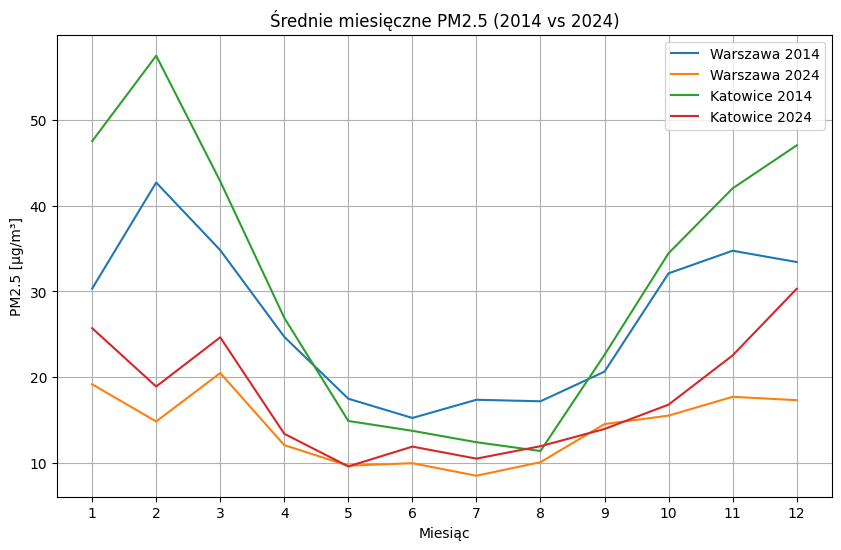

In [17]:
# Rysowanie wykresu porównawczego
visualizations.plot_monthly_averages(chosen_df, "Średnie miesięczne PM2.5 (2014 vs 2024)")

# Opis różnic i interpretacja wyników
Zarówno w Warszawie, jak i Katowicach widać wyraźny wzrost stężenia PM2.5 w zimowych miesiącach (styczeń-marzec i październik-grudzień). Najniższe stężenia występują latem (maj-sierpień), co wynika z sezonowego korzystania z ogrzewania.

Katowice w 2014 roku mają wyraźnie wyższe stężenia niż Warszawa (zielona linia powyżej niebieskiej), szczególnie zimą.
Natomiast w 2024 roku średnie dla Katowic i Warszawy są do siebie zbliżone, ale Katowice nadal mają lekko wyższe wartości zimą. 
Ogólnie Katowice są bardziej zanieczyszczone PM2.5 niż Warszawa, ale różnica między poziomami zanieczyszczenia zmniejsza się. Przyczny większego zanieczyszczenia powietrza w Katowicach można doszukiwać się większym udziałem, m.in. przemysłu ciężkiego, który emituje zanieczyszczenia.

W 2024 roku średnie stężenia są znacznie niższe niż w 2014 dla obu miast.
Zmniejszenie stężenia PM2.5 w 2024 jest najbardziej widoczne w miesiącach zimowych (styczeń–marzec), co sugeruje poprawę jakości powietrza, prawdopodobnie dzięki efektywnym programom antysmogowym oraz wymianie nieefektywnych źródeł ogrzewania.
Ogólny trend jest pozytywny - średnie miesięczne wartości PM2.5 spadają w obu miastach w ciągu dekady.

## 3. Heatmapa miesięcznych średnich

Dla każdej miejscowości przedstaw heatmapę średnich miesięcznych stężeń PM2.5 w latach lat 2014, 2019 i 2024 (oś X – miesiąc, oś Y – rok). Uśrednij wartości po wszystkich stacjach w danej miejscowości. Każdy panel (facet) ma odpowiadać jednej miejscowości. Dołącz interpretację obserwowanych wyników.

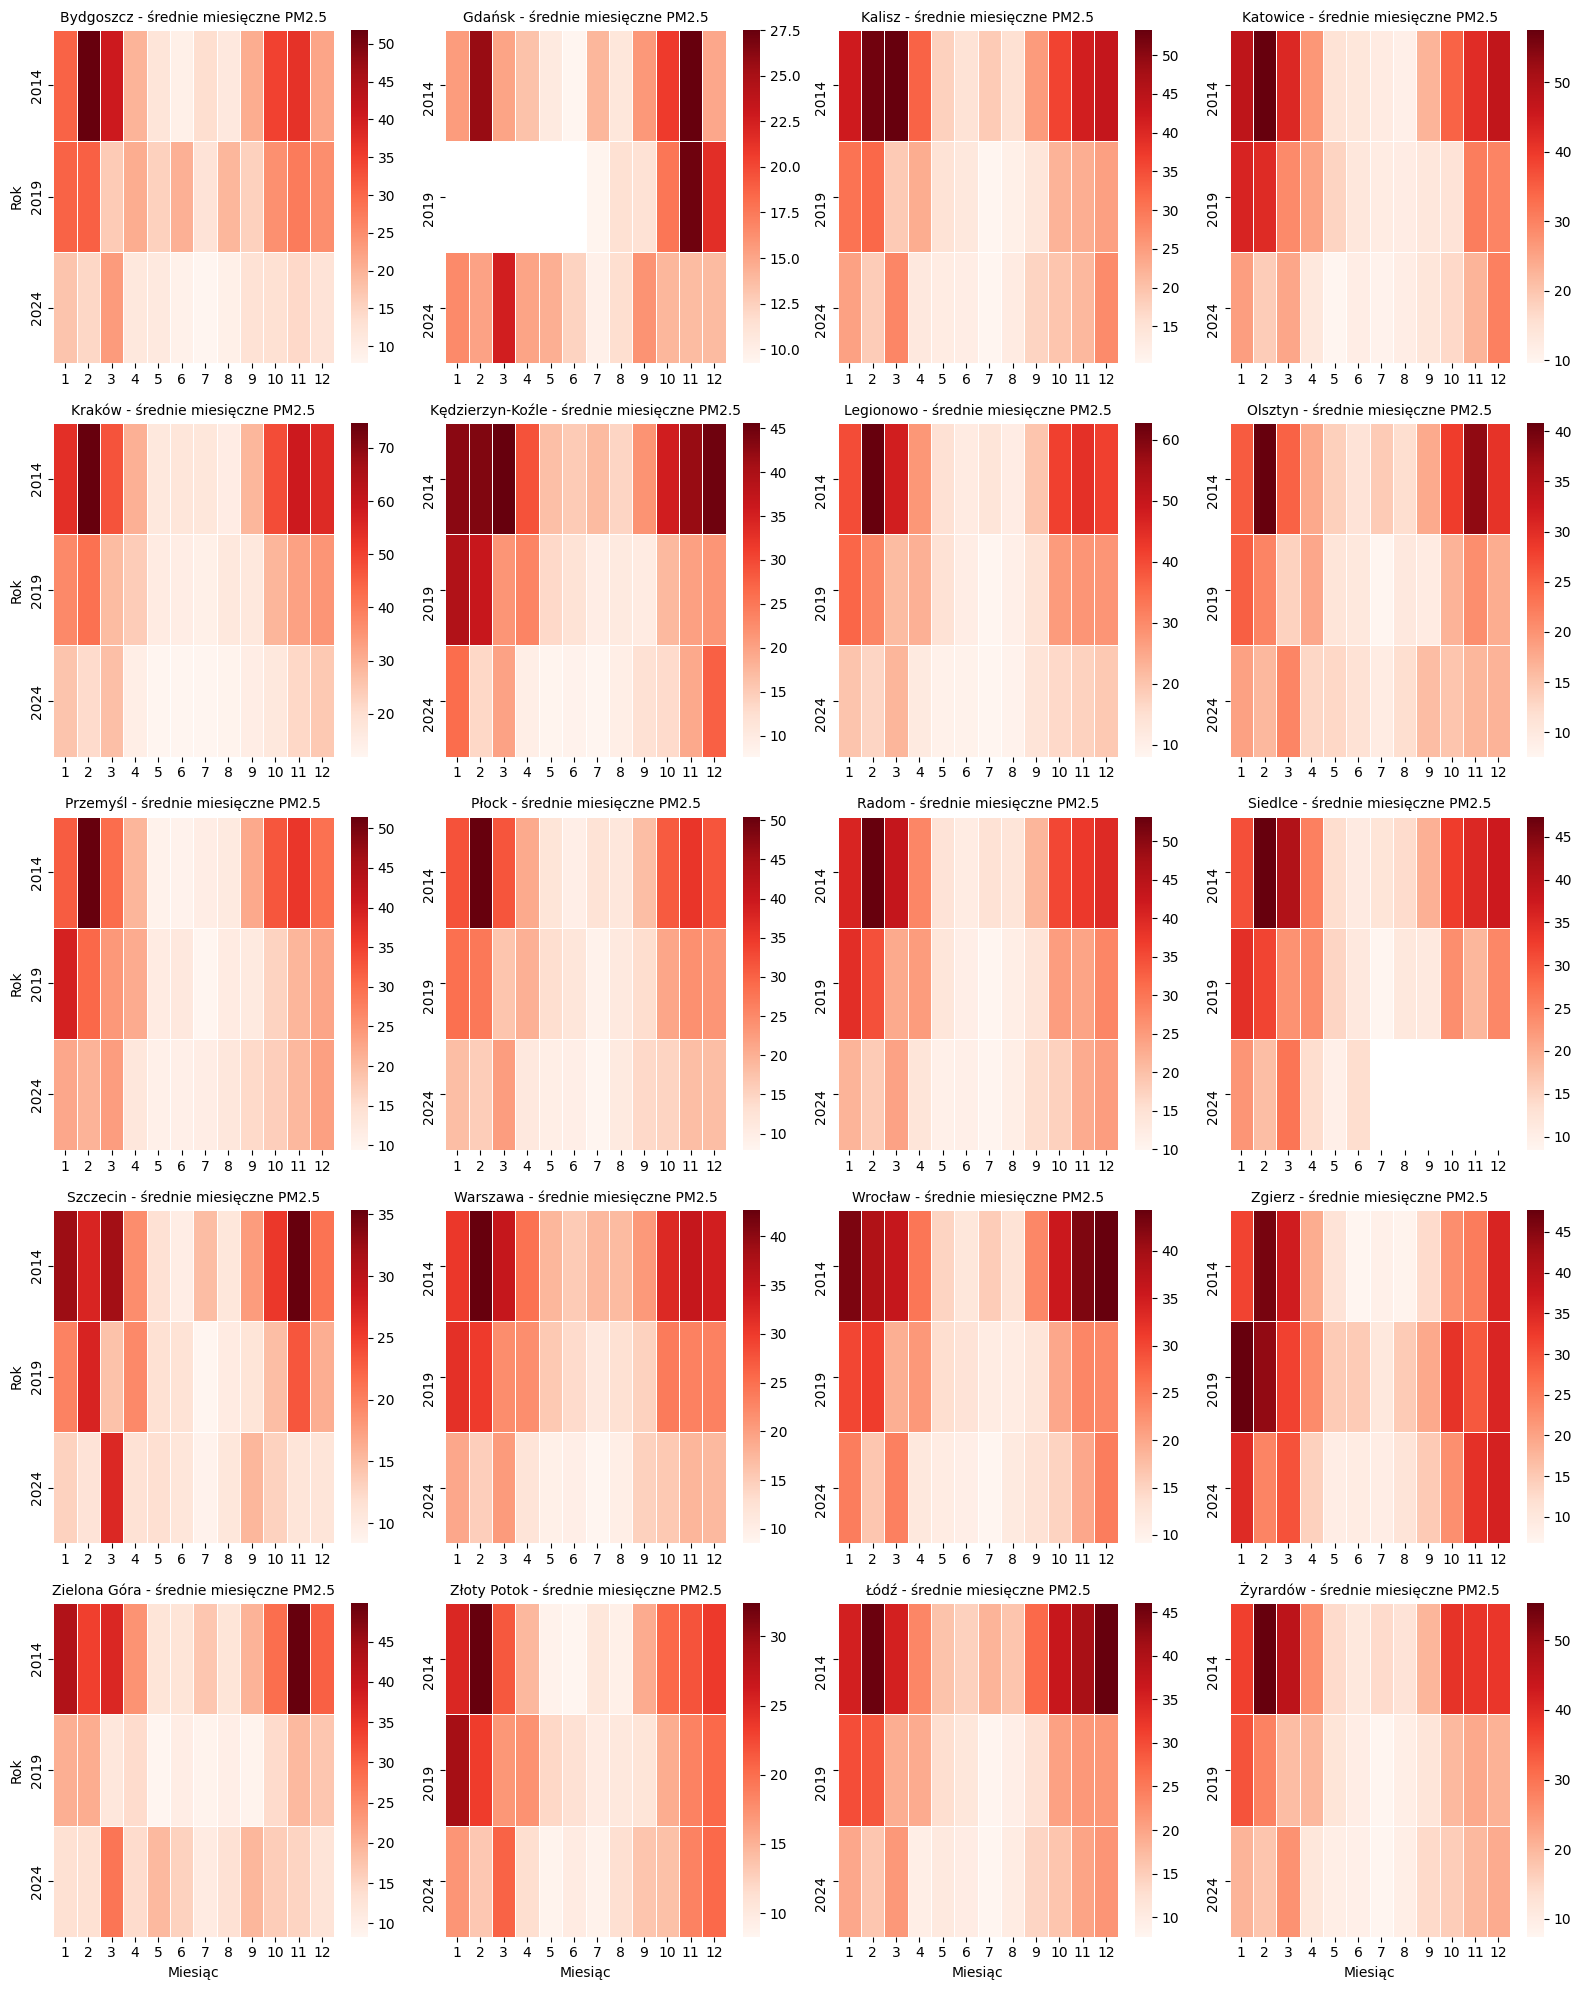

In [18]:
# Rysowanie heatmapy dla każdego miasta
city_month_means_df = city_month_means_df.reset_index()
visualizations.plot_heatmaps(city_month_means_df)

# Interpretacja wyników
Na heatmapach widoczna jest wyraźna sezonowość zmian zanieczyszczenia powietrza pyłem PM2.5. Każdego roku największe stężenie PM2.5 było obserwowane w okresie październik-marzec, czego przyczyny można doszukiwać się w okresie grzewczym. Z kolei w miesiącach letnich poziomy PM2.5 są znacznie niższe. 

Widać także, że walka z zanieczyszeniem powietrza jest skuteczna - w kolejnych latach stężenia PM2.5 maleją:</br>
W 2019 roku, w porównaniu do 2014 roku, większość miast odnotowała spadek średniego stężenia w miesiącach październik–grudzień. W 2024 roku tendencja spadkowa obejmuje już niemal wszystkie miesiące jesienno-zimowe, choć wyjątkiem pozostaje Zgierz, gdzie taki efekt nie jest widoczny.</br>

Podsumowując, wyniki pokazują stopniową poprawę jakości powietrza w okresie jesienno-zimowym, przy jednoczesnym utrzymaniu niskiego poziomu PM2.5 latem.
Dodatkowo można zauważyć braki danych pomiarowych: dla Gdańska w okresie styczeń - czerwiec 2019 oraz dla Siedlec w okresie lipiec-grudzień 2024.

## 4. Dni z przekroczeniem normy (WHO)

Dla każdej stacji i roku policz liczbę dni, w których wystąpiło przekroczenie dobowej normy stężenia PM2.5, czyli 15 µg/m³ (źródło: [https://airscan.org/new-who-air-quality-guidelines-2021/](https://airscan.org/new-who-air-quality-guidelines-2021/)). Znajdź 3 stacje z najmniejszą i 3 stacje z największą liczbą dni z przekroczeniem normy dobowej w 2024 roku. Dla tych 6 stacji narysuj *grouped barplot*, gdzie oś X – stacje, oś Y – liczba dni z przekroczeniem, kolor – rok (2014, 2019, 2024). Dołącz opis i interpretację obserwowanych różnic.

In [19]:
exceeded_results = calculations.calculate_days_exceeding_limit(combined_df)
exceeded_top_bottom_df = calculations.get_3_lowest_highest(exceeded_results, 2024)

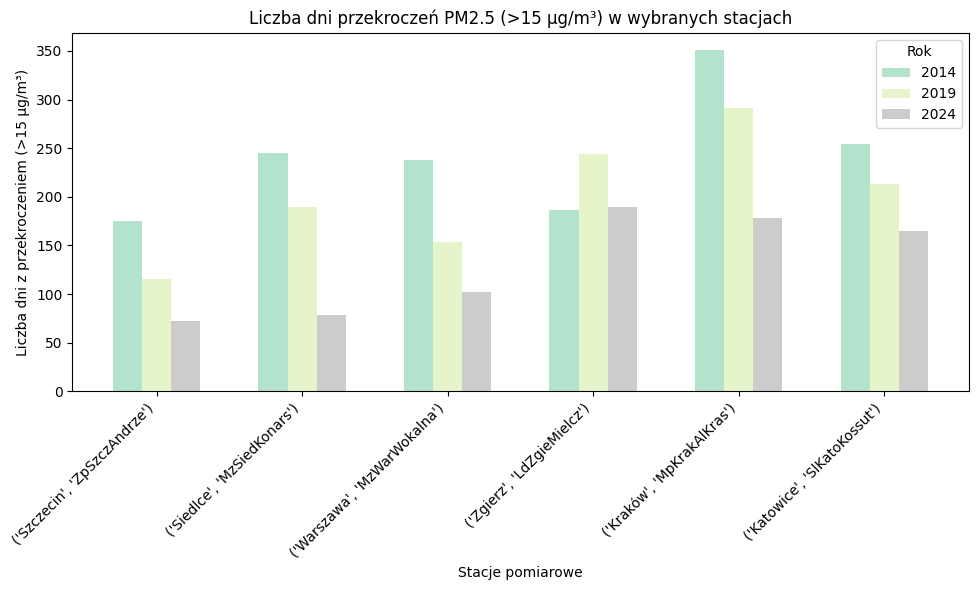

In [20]:
# Rysowanie wykresu słupkowego porównującego liczbę dni przekroczeń dla wybranych stacji w różnych latach
visualizations.plot_exceeding_days(exceeded_top_bottom_df, "Liczba dni przekroczeń PM2.5 (>15 µg/m³) w wybranych stacjach")


# Opis różnic
U większości stacji widać wyraźny spadek z roku na rok — wyjątkiem jest Zgierz, gdzie poprawy nie ma. Należy również zaznaczyć, że wyniki dla Siedlc z 2024 obejmują jednynie pierwszą połowę roku (dla drugiej brak pomiarów) dlatego nie odzwierciedlają w pełni rzeczywistej sytuacji. Stacje, które dziś znajdują się w grupie o najgorszych wynikach, miały w 2014 roku poziom przekroczeń zbliżony do stacji, które obecnie należą do najczystszych z wyjątkiem stacji z Krakowa. Ta stacja w 2014 roku odnotowywała bardzo wysoki poziom zanieczyszczeń(ok. 350 dni w roku), ale jednocześnie wykazała największą poprawę na przestrzeni lat. Pozostałe dwie stacje z najgorszymi wynikami pokazują dużo wolniejsze tempo spadku lub jego brak.</br>
W 2024: stacje z najgorszymi rezultatami mają ok. 180–190 dni z przekroczeniem norm, a stacje z najlepszymi ok. 70-100 dni.</br> 
Poza stacją w Zgierzu widoczna jest wyraźna tendencja spadkowa z roku na rok.

# Interpretacja wyników
Poprawa powietrza widoczna jest na niemal wszystkich stacjach. Największą poprawę odniosła stacja w Krakowie, co potwierdza skuteczność działań antysmogowych podejmowanych w tym mieście. Mimo tego w 2024r. ta stacja wciąż pozostaje wśród 3 stacji z największą liczbą dni z przekroczeniem norm. Brak poprawy w Zgierzu sugeruje problemy z wdrażaniem tam polityki czystego powietrza. Stacja w Katowicach mimo, że w 2014r. miała poziom zanieczyszczenia porównywalny ze stacjami z obecnie najlepszymi wynikami pozostała w top 3 najgorszych stacji.</br>
Stacje charakteryzujące się najlepszymi wynikami w 2024 roku wykazały stabilny i szybki spadek liczby dni z przekroczeniami - najlepsze wyniki w 2024r. są warunkowane tempem zmian, a nie początkowym stopniem zanieczyszczenia(poza Krakowem).